### HTP using google cloud ocr and gpt formatting

In [ ]:
# %pip install numpy
# %pip install pytz
# %pip install google-cloud-vision
# %pip install python-dotenv
# %pip install opencv-python
# %pip install matplotlib
# %pip install openai

In [1]:

from PIL import Image
import xml.etree.ElementTree as ET
import cv2
import numpy as np
import matplotlib.pyplot as plt
import openai
from prompt import HTR_MARKDOWN_OUTPUT_PROMPT
from google.cloud import vision
from dotenv import load_dotenv


client = vision.ImageAnnotatorClient()
load_dotenv()

In [2]:

# detecting text from images using google-cloud vision
def detect_text(path):
    """Detects text in the file."""

    with open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations

    if response.error.message:
        raise Exception(
            "{}\nFor more info on error messages, check: "
            "https://cloud.google.com/apis/design/errors".format(response.error.message)
        )
    
    return texts, response


In [3]:
image_folder = r"C:\Users\DELL\Documents\Curate\curate-v1\core\test_data\english_grammer"
image_path1 = image_folder + "/image1.jpg"
image_path2 = image_folder + "/image2.jpg"
image_path3 = image_folder + "/image3.jpg"


mmh_folder = r"C:\Users\DELL\Documents\Curate\curate-v1\core\test_data\mmh_english"
image_path1 = mmh_folder + "/mmh_image1.jpg"
image_path2 = mmh_folder + "/mmh_image2.jpg"
image_path3 = mmh_folder + "/mmh_image3.jpg"
image_path12 = mmh_folder + "/mmh_image12.jpg"
image_path22 = mmh_folder + "/mmh_image22.jpg"
image_path25 = mmh_folder + "/mmh_image25.jpg"
image_path89 = mmh_folder + "/mmh_image89.jpg"

test_image_path = image_path12
Image.open(test_image_path)

In [13]:
# get text from ocr api

def get_paras_data(image_path, sort_dict = True, only_text = True):

    texts, resp = detect_text(image_path)
    paras_data = {}
    for page in resp.full_text_annotation.pages:
        for block in page.blocks:
            for para in block.paragraphs:
                vertices = para.bounding_box.vertices
                vertex = vertices[0].x, vertices[0].y, vertices[2].x, vertices[2].y
                para_text = ""
                for word in para.words:
                    word_text = ""
                    for symbol in word.symbols:
                        word_text += symbol.text
                    para_text += word_text + " "
                paras_data[vertex] = para_text

    if sort_dict == True:
        paras_data = dict(sorted(paras_data.items(), key=lambda x: x[0][1]))
    
    return texts[0].description, list(paras_data.values()) if only_text else paras_data

text, paras_data = get_paras_data(test_image_path)

print(paras_data)

In [19]:
# text formatting from OCR results using GPT

system_prompt = """You are a helpful AI assistant"""
system_message = {'role': "system", "content": system_prompt}

prompt = HTR_MARKDOWN_OUTPUT_PROMPT
user_message = {'role': "system", "content": prompt}

conversation = [system_message, user_message]

def generate_formatted(conversation, input_text, model_id=None):
    
    if model_id == None:
        model_id = "gpt-4"

    input_prompt = f"""
        New Input - 
        ```
        {input_text}
        ```
        Properly format the output text in markdown language.
        Output: 

        """
    
    input_message = {'role': "user", "content": input_prompt}
    conversation.append(input_message)

    retry = 0
    while retry < 3:
        response = openai.ChatCompletion.create(
            model = model_id,
            messages = conversation,
            temperature = 0.2,
        )
        output = response.choices[0].message.content
        print(f"Tries - {retry}")
        if (output.startswith("<output>") and output.endswith("<output>")):
            output.replace("<output>", "")
            return output

    raise AssertionError("Could not generate proper text in 3 tries")
    
def ignore_strings(text, strings):
    for string in strings:
        text = text.replace(string, "")
    return text

In [20]:
result = generate_formatted(input_text=str(paras_data))

strings = ["Scanned by CamScanner", "www.OnlineStudyPoints.com "]
result = ignore_strings(text = result, strings=strings)

print(result)

Tries - 0

- **DELHI SULTANATE (1206-1526)**
  - **Slave Dynasty (1206-1290)**
    - **Qutubbuddin Aibak (1206-1210)**: Founder of Slave Dynasty, with Lahore as the capital. As a ruler, he donated lakhs of rupees to his region. That's why citizens of Lahore gave him the title of "Lakh Baksh". Aibak means "God of Moon". He was the only ruler who never sat on the throne as a King. He died while playing Polo in 1210. His tomb is in Lahore.
    - **Aramshah (1210)**: Son of Qutubbuddin Aibak, ruled only for 6 months.
    - **Iltutamish (1211)**: He was the governor appointed by his slave, Badayten. He killed Aramshah and became the next ruler of the Slave Dynasty.



- **DELHI SULTANATE (1206-1526)**
  - **Slave Dynasty (1206-1290)**
    - **Qutubbuddin Aibak (1206-1210)**: Founder of Slave Dynasty, with Lahore as the capital. As a ruler, he donated lakhs of rupees to his region. That's why citizens of Lahore gave him the title of "Lakh Baksh". Aibak means "God of Moon". He was the only ruler who never sat on the throne as a King. He died while playing Polo in 1210. His tomb is in Lahore.
    - **Aramshah (1210)**: Son of Qutubbuddin Aibak, ruled only for 6 months.
    - **Iltutamish (1211)**: He was the governor appointed by his slave, Badayten. He killed Aramshah and became the next ruler of the Slave Dynasty.

In [21]:
input_text = """
Indian History
(Michael India
Pice-Historic period
(only faiths)
Dedii
Mughal
17Dounful of Pryagia
Pasto-Historic period
Sultomate Sultomate
2)Price of Exoticity
(focalt / written sources)
(Pictogrophic script)
(issue
Babur
4) Social Reform
Babur - Hudonic Period
(600 BC - 712 AD)
(Susan Sun)
Tupagai
Albar
1947 - Indique
(cascted)
Suggech
Tobangi
1947 - 1361
India
Susanjayan
(Contemporary India
Price-historic period
Anargayesh
Stone Age
Copper Age
(3000 BC - 2000 BC)
Pakciditile
Necothic
faster of India Archeology - Alexandri
(first hurley)
(Agriculture)
(usanbe - 25mba)
(IESE)
(Demonstration)
3) Indian Museum - Kolkata
(80056 - 40066)
4) National museum - Delhi
BC - Before circuit
10) Sclonghan museum - Hylabrad
AD - Anno Domin or
or
GE - Common Era
(Bhonge Age)
(Bhonge Age)
D Indus Valuy civilization (2500 BC - 1750 BC)
2) Vedii civilization (1500 BC - 600 BC)"""

result = generate_formatted(input_text= input_text)

strings = ["Scanned by CamScanner", "www.OnlineStudyPoints.com "]
result = ignore_strings(text = result, strings=strings)

if result:
    print(result.replace("<output>", ""))
else:
	print("No text extracted")

Tries - 0

# Indian History
(Medieval India)
- Pre-Historic period (only facts)
- Delhi
- Mughal
- Sultanate Sultanate
- Price of Exoticity (factual/written sources)
- Pictographic script
- Babur
- Social Reform
- Babur - Hudonic Period (600 BC - 712 AD)
- Sultanate
- Albar
- 1947 - Independence
- Suggested
- 1947 - 1361
- India
- Contemporary India
- Pre-historic period
- Stone Age
- Copper Age (3000 BC - 2000 BC)
- Neolithic
- Father of India Archeology - Alexander
- Agriculture
- Demonstration
- Indian Museum - Kolkata (80056 - 40066)
- National Museum - Delhi
- BC - Before Christ
- Salarjung Museum - Hyderabad
- AD - Anno Domini or
- CE - Common Era
- Bronze Age
- Indus Valley Civilization (2500 BC - 1750 BC)
- Vedic Civilization (1500 BC - 600 BC)



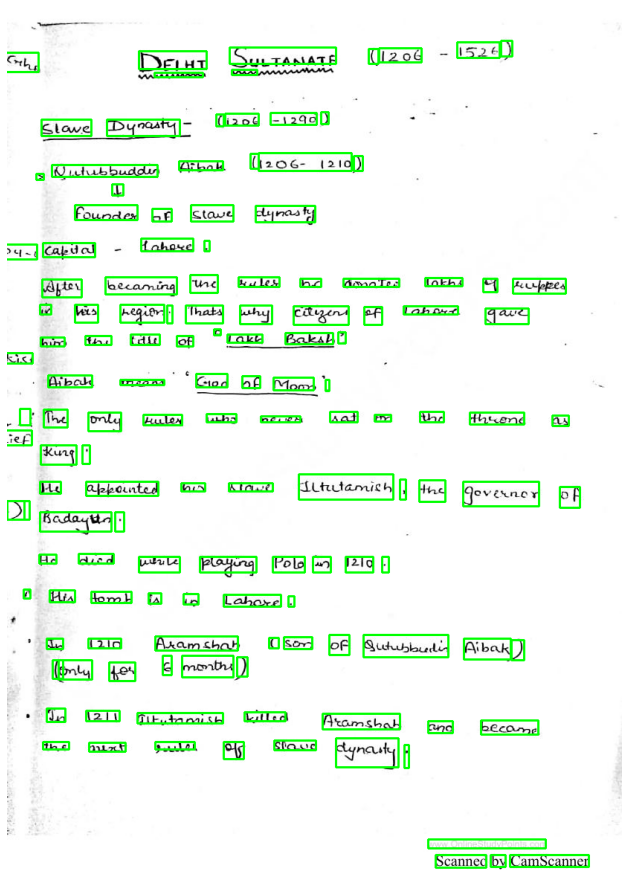

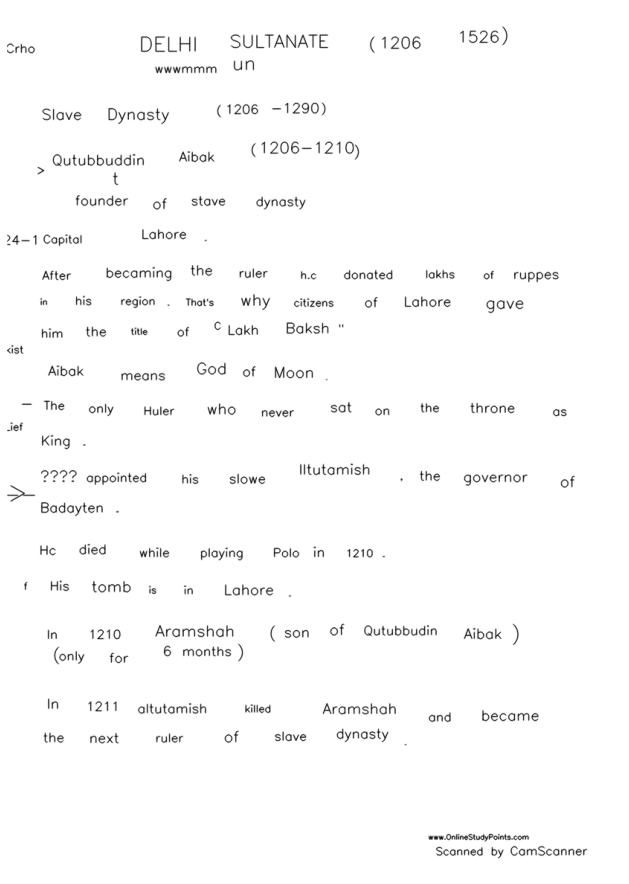

In [11]:

def show_bounding_poly_on_image(image_path, show_image_with_text = True, save_image_with_text = False):
    image = cv2.imread(image_path)

    texts, response = detect_text(image_path)

    for text in texts[1:]:
        vertices = []
        for vertex in text.bounding_poly.vertices:
            vertices.append((vertex.x, vertex.y))
        
        start_point = vertices[0]
        end_point = vertices[-2]
        color = (0, 255, 0)

        image = cv2.rectangle(image, start_point, end_point, color, 2)


    plt.figure(figsize= (20,16))
    plt.axis('off')
    plt.imshow(image)
    plt.show()

    # print(texts[0].description)
    if show_image_with_text:
        def calculate_font_size(text, xs, ys):

            height = ys[1] - ys[0]
            width = (xs[1] - xs[0]) / len(str(text))

            # return (height + width) * 2e-2
            return width * 5e-2
        
        blank_image = Image.new('RGB', (image.shape[1], image.shape[0]), color=(255,255,255))
        image = np.asarray(blank_image)

        for text in texts[1:]:
            vertices_start = text.bounding_poly.vertices[0]
            vertices_end = text.bounding_poly.vertices[-2]
            x1, y1 = int(vertices_start.x), int(vertices_start.y)
            x2, y2 = int(vertices_end.x), int(vertices_end.y)

            mid_x = (x1 + x2) // 2
            mid_y = (y1 + y2) // 2

            text_string = str(text.description)
            font_size = calculate_font_size(text_string, (x1, x2), (y1, y2))
            font = cv2.FONT_HERSHEY_SIMPLEX
        
            # org = (mid_x, mid_y)
            org = (x1, y1)
            fontScale = font_size
            color = (0, 0, 0)
            
            # Line thickness of 2 px
            thickness = 1
            
            # Using cv2.putText() method
            image = cv2.putText(image, text_string, org, font, 
                            fontScale, color, thickness, cv2.LINE_AA)

        plt.figure(figsize = (20,16))
        plt.axis('off')
        plt.imshow(image)
        plt.show()

        if save_image_with_text:
            cv2.imwrite("image_with_text.jpg", image)

    else:
        print(texts[0].description)

show_bounding_poly_on_image(test_image_path, show_image_with_text= True, save_image_with_text = True)
    
